<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Nov3-4/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [3]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files1=glob.glob('/content/drive/MyDrive/Data/CATS_DOGS/*')

In [4]:
len(files1)

1787

In [5]:
import random

files = random.sample(files1, len(files1))

In [6]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.

In [7]:
train_x=[]
train_y=[]
for file in files[:600]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

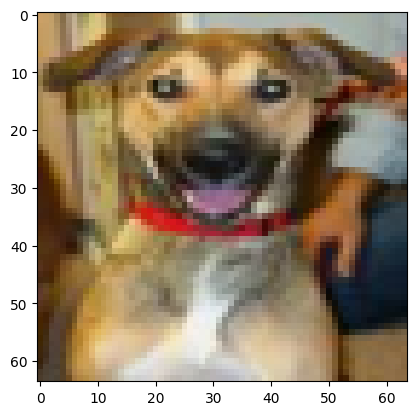

In [8]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [9]:
test_x=[]
test_y=[]
for file in files[600:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

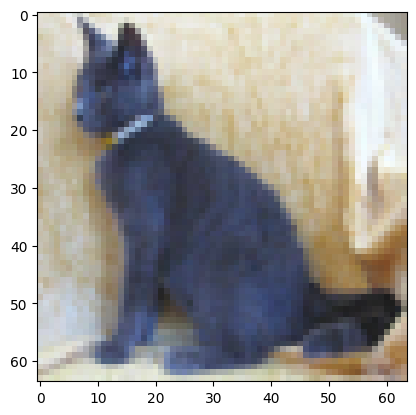

In [10]:
plt.imshow(test_x[0])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [11]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [12]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [13]:
train_set_x.shape

(12288, 600)

Ya esta listo nuestro set de datos para poder trabajar con el.

In [14]:
def sigmoid(z):
  sig = 1/(np.exp(-z)+1)

  return sig

def cost_log(y, y_hat):
  y = np.squeeze(y)
  cost = -1/len(y)*(np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

  return cost

(12288, 1187)

In [14]:
def gradient_descent(x_train, y_train, n_iter, stepsize=.1):

  y_train = np.squeeze(y_train)

  costs = []
  w = np.zeros(x_train.shape[0])
  b = 0

  z = w@x_train + b
  y_hat = sigmoid(z)

  costs.append(cost_log(y_train, y_hat))

  for i in range(n_iter):

    #print((y_hat - np.squeeze(y_train)).shape, x_train.shape)
    dw = 1/(x_train.shape[1])*x_train@(y_hat - y_train)
    db = 1/(x_train.shape[1])*np.sum(y_hat - y_train)
    #Algoritmo Descenso
    w = w - stepsize*dw
    b = b - stepsize*db

    #print(w.shape)

    z = w@x_train + b
    y_hat = sigmoid(z)

    #print(w.shape)
    cost = cost_log(y_train, y_hat)
    costs.append(cost)

    #if (i%500 == 0):
      #print('Stepsize: {} | Cost: {:}'.format(i, cost))


  return costs, w, b


def neuron(x_train, y_train, x_test=0, y_test=0):

  pass
  #Gradient Descent

In [15]:
test_set_y[:,:100].shape

(1, 100)

In [69]:
costos, w, b = gradient_descent(test_set_x, test_set_y, 10000, stepsize=.01)

KeyboardInterrupt: ignored

In [70]:
b

-0.14008408806235267

In [71]:
print(w.shape, test_set_x.shape)

(12288,) (12288, 1187)


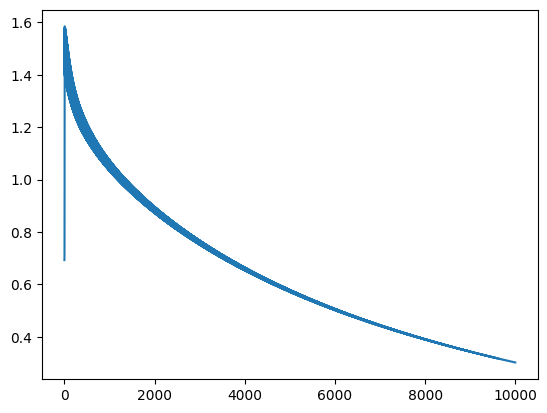

In [72]:
plt.plot(costos)

In [25]:
b.mean()

-0.00015786121237092805

In [28]:
def sigmoid(z):
  sig = 1/(np.exp(-z)+1)

  return sig

def cost_log(y, y_hat):
  y = np.squeeze(y)
  cost = -1/len(y)*(np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

  return cost

z = w@train_set_x + b

predictions = sigmoid(z)

predictions[predictions > .5] = 1
predictions[predictions < .5] = 0


predictions = predictions[(predictions == np.squeeze(train_set_y))]

print('Accuracy in the data_train: {} '.format(predictions.shape[0]/600*100))

z = w@test_set_x + b

predictions = sigmoid(z)

predictions[predictions > .5] = 1
predictions[predictions < .5] = 0

predictions = predictions[(predictions == np.squeeze(test_set_y))]

print('Accuracy in the test: {} '.format(predictions.shape[0]/(test_set_y.shape[1])*100))



Accuracy in the data_train: 51.66666666666667 
Accuracy in the test: 84.91996630160067 


In [29]:
test_set_y.shape

(1, 1187)

In [27]:
import torch
import torch.nn.functional as F
from tqdm.notebook import tqdm

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def cost_log(y_true, y_pred):
    epsilon = 1e-15
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    return -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()

def gradient_descent(x_train, y_train, n_iter, stepsize=0.1):
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)

    # Move tensors to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    x_train, y_train = x_train.to(device), y_train.to(device)

    y_train = y_train.squeeze()

    costs = []
    w = torch.zeros(x_train.shape[0], device=device)
    b = torch.tensor(0.0, device=device)

    for i in tqdm(range(n_iter)):
        z = torch.matmul(w, x_train) + b
        y_hat = sigmoid(z)

        dw = (1 / x_train.shape[1]) * torch.matmul(x_train, y_hat - y_train)
        db = (1 / x_train.shape[1]) * torch.sum(y_hat - y_train)

        w = w - stepsize * dw
        b = b - stepsize * db

        cost = cost_log(y_train, y_hat)
        costs.append(cost.item())

    return costs, w.cpu().numpy(), b.item()


costos, w, b = gradient_descent(test_set_x, test_set_y, 10000, .05)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

TypeError: ignored

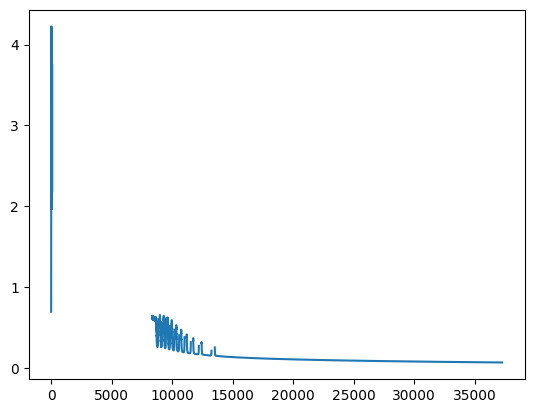

In [19]:
plt.plot(costos)